### Proyecto Final | Sprint 11 / 2
#### Allison Garces

In [23]:
#Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Instituto Colombiano para la Evaluación de la Educación - ICFES (2022-1). Datalcfes. Saber 11 ç
#https://www.icfes.gov.co/web/guest/data-icfes

datos = pd.read_csv("Data_Icfes_SABER11_2022-1_v6.csv", sep=";", encoding='latin-1')

In [5]:
df = pd.DataFrame(data=datos)
df = df.sample(frac=0.7, random_state=1) #Una muestra aleatoria del 50% DataFrame y ramdom_state True
df

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONINTERNET,COLE_BILINGUE,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,CALIFICACION
13112,4,1,1,1,1,1,1,2,1,2,0,1,66,68,66,70,83,343,0
9498,2,1,1,1,1,0,0,0,1,2,0,1,53,54,47,29,42,227,2
10737,2,1,1,1,1,0,0,1,2,1,0,1,71,61,62,63,74,325,0
7351,6,1,1,1,1,1,1,3,2,1,1,5,62,62,58,58,74,305,0
6911,5,1,1,1,1,1,1,3,1,2,1,5,69,100,70,72,88,393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,3,0,1,1,1,0,0,0,1,0,0,5,57,59,47,56,59,275,0
1787,1,1,1,0,0,0,0,2,1,3,0,5,59,57,58,53,52,282,0
10715,3,1,1,1,1,1,1,1,2,2,0,1,67,72,65,69,64,340,0
9200,1,0,0,0,0,0,0,2,0,2,0,3,51,34,33,40,35,196,2


In [21]:
#Declarar vector de características y variable de destino
X = df
y = df['CALIFICACION']

In [7]:
df1 = datos.groupby(('CALIFICACION')).CALIFICACION.count()
df1

CALIFICACION
0    10338
1       22
2     2980
Name: CALIFICACION, dtype: int64

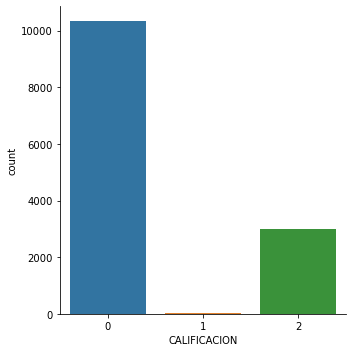

In [8]:
sns.catplot(x = "CALIFICACION", data = datos, kind = "count");

<AxesSubplot:>

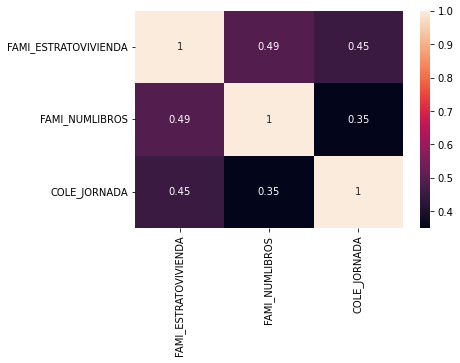

In [20]:
#Tabla correlacion del Alcohol, Magnisio y Intensidad del Color
correlation_matrix = df[['FAMI_ESTRATOVIVIENDA','FAMI_NUMLIBROS','COLE_JORNADA']].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

print("X_train: ", X_train.shape)
print("X_test ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (7003, 19)
X_test  (2335, 19)
y_train:  (7003,)
y_test:  (2335,)


In [26]:
#Clasificación del árbol de decisión
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Clasificador de árboles de decisión del tren
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [27]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

1.0


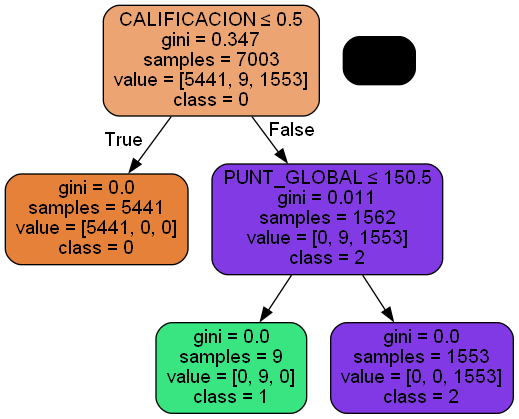

In [30]:
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = df.columns,
                class_names=['0','1','2']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('icfess.png') 
Image(graph.create_png())

In [31]:
# Crear objeto clasificador de árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy")

# Clasificador de árboles de decisión de tren
clf = clf.fit(X_train,y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)


In [32]:
# calculate accuracy

print(metrics.accuracy_score(y_test, y_pred))

1.0


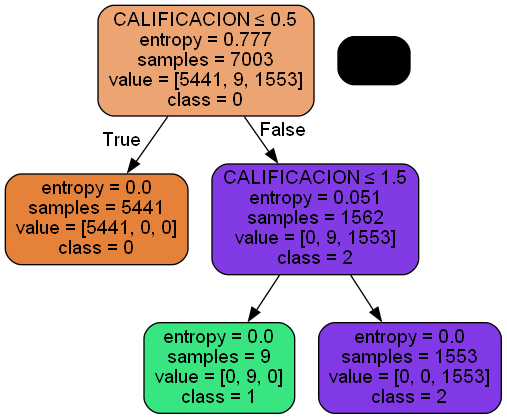

In [34]:
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = df.columns,
                class_names=['0','1','2']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('icfes2.png') 
Image(graph.create_png())

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

print("X_train: ", X_train.shape)
print("X_test ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (7003, 19)
X_test  (2335, 19)
y_train:  (7003,)
y_test:  (2335,)


In [50]:
from sklearn import svm

#Crear un Clasificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Entrena al modelo usando los conjuntos de entrenamiento
clf.fit(X_train, y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [51]:
print(metrics.accuracy_score(y_test, y_pred))

0.9995717344753747


In [52]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = metrics.confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

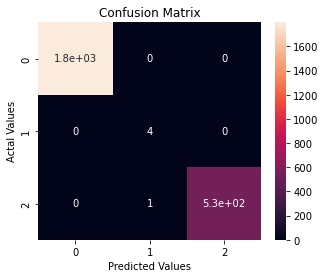

In [53]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [64]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, labels=y, target_names=X)
print(report)

                              precision    recall  f1-score   support

        FAMI_ESTRATOVIVIENDA       1.00      1.00      1.00      1799
          FAMI_TIENEINTERNET       1.00      1.00      1.00       532
        FAMI_TIENESERVICIOTV       1.00      1.00      1.00      1799
        FAMI_TIENECOMPUTADOR       1.00      1.00      1.00      1799
    FAMI_TIENEHORNOMICROOGAS       1.00      1.00      1.00      1799
         FAMI_TIENEAUTOMOVIL       1.00      1.00      1.00      1799
FAMI_TIENECONSOLAVIDEOJUEGOS       1.00      1.00      1.00      1799
              FAMI_NUMLIBROS       1.00      1.00      1.00      1799
     FAMI_SITUACIONECONOMICA       1.00      1.00      1.00       532
     ESTU_DEDICACIONINTERNET       1.00      1.00      1.00       532
               COLE_BILINGUE       1.00      1.00      1.00      1799
                COLE_JORNADA       1.00      1.00      1.00      1799
        PUNT_LECTURA_CRITICA       1.00      1.00      1.00      1799
            PUNT_MA

In [65]:
# Aplicar validación cruzada para evaluar los resultados.
scores=cross_val_score(clf,X_train,y_train,cv=5)
scores

array([1.        , 1.        , 1.        , 0.99928571, 1.        ])

In [67]:
#Calcular la media y la desviación estándar de la validación
print("Mean: %0.2f ; Standard Dev.: %0.2f)" % (scores.mean(), scores.std()))

Mean: 1.00 ; Standard Dev.: 0.00)
